<img src="static/img/co2.jpg.jpg" width="850" height="300">

## 1. Import des packages

In [104]:
# pip install pandas
# !pip install sodapy

In [105]:

import pandas as pd
import numpy as np
from scipy import stats

import matplotlib.pyplot as plt
import seaborn as sns


from sqlalchemy import create_engine, types, text

from sqlalchemy import create_engine, types



from sklearn.preprocessing import FunctionTransformer

#pipeline
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, FunctionTransformer
from sklearn.preprocessing import StandardScaler, RobustScaler


from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from xgboost import XGBRegressor
#validation croisée, gridsearch et métriques d'erreur
from sklearn.multioutput import MultiOutputRegressor
from sklearn.compose import ColumnTransformer
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import GridSearchCV

import joblib

from sklearn.compose import TransformedTargetRegressor
from sklearn.linear_model import LinearRegression, Lasso, ElasticNet, SGDRegressor, Ridge

from sklearn import set_config
set_config(display='diagram')

## 2. Import du dataset

In [106]:
# credential = DefaultAzureCredential()
# appconfig_conn_str = "Endpoint=https://app-co2-config.azconfig.io;Id=8/Iv;Secret=8qfVLXI2aDt1Wg0jPMnCLx5lHIDvdAuzucBti8of7+M="
# appconfig_client = AzureAppConfigurationClient.from_connection_string(connection_string=appconfig_conn_str)

# # Retrieve the connection string from Azure App Configuration
# setting = appconfig_client.get_configuration_setting(key="pg-connect-string")
# secret_value = setting.value

# # Create the SQLAlchemy engine
# engine = create_engine(secret_value)
# print(engine)
# data_year = 2016
# with engine.begin() as conn:
#         print(conn)
#         result = conn.execute(text(f"""SELECT "siteenergyusekWh", totalghgemissions, log_totalghgemissions, log_siteenergyusekwh, haversinedistance, yearbuilt, "is_using_electricitykWh", "is_using_naturalgaskWh", "is_using_steamusekWh",
#    largestpropertyusetypegfa, numberofbuildings, numberoffloors, propertygfabuildings, buildingtype, primarypropertytype FROM super_table_tm WHERE datayear='{data_year}'"""))
#         # Create a DataFrame from the query result 
#         df = pd.DataFrame(result.fetchall(), columns=result.keys())
        
# df.head()

In [107]:
# Load data from a CSV file
df = pd.read_csv('data/dataset_sample.csv', sep=';')

In [108]:
# drop nan 
df.dropna(axis=0, inplace=True)
# check 
df.describe()

,siteenergyusekbtu,totalghgemissions,yearbuilt,is_using_electricitykWh,is_using_naturalgaskWh,is_using_steamusekWh,largestpropertyusetypegfa,numberofbuildings,numberoffloors,propertygfabuildings
count,9.930000e+02,993.000000,993.00000,993.000000,993.000000,993.000000,9.930000e+02,993.000000,993.000000,9.930000e+02
mean,1.004587e+07,213.844914,1965.29003,0.997986,0.659617,0.087613,1.212762e+05,1.097684,5.920443,1.317142e+05
std,2.592511e+07,846.991720,33.29960,0.044856,0.474077,0.282874,1.804178e+05,1.131266,7.563222,1.905844e+05
min,9.055900e+04,0.000000,1900.00000,0.000000,0.000000,0.000000,6.900000e+03,0.000000,0.000000,1.092500e+04
25%,1.529510e+06,23.000000,1930.00000,1.000000,0.000000,0.000000,3.569400e+04,1.000000,2.000000,4.103000e+04
50%,3.644982e+06,63.000000,1971.00000,1.000000,1.000000,0.000000,6.393400e+04,1.000000,4.000000,6.981700e+04
75%,9.230223e+06,175.000000,1994.00000,1.000000,1.000000,0.000000,1.242310e+05,1.000000,6.000000,1.332980e+05
max,4.483853e+08,16871.000000,2015.00000,1.000000,1.000000,1.000000,1.680937e+06,27.000000,76.000000,1.765970e+06


In [109]:
df.shape

(993, 12)

In [110]:
df.isna().sum()

siteenergyusekbtu            0
totalghgemissions            0
yearbuilt                    0
is_using_electricitykWh      0
is_using_naturalgaskWh       0
is_using_steamusekWh         0
largestpropertyusetypegfa    0
numberofbuildings            0
numberoffloors               0
propertygfabuildings         0
buildingtype                 0
primarypropertytype          0
dtype: int64

In [111]:
# Save to csv the df:
df.to_csv('data/dataset_for_z_score.csv', index=False)

## Outliers detections

<p> Sur les précédents graphiques on observe une divergence entre valeurs prédites et valeurs réelles,</br>
 pour certaines observations voyons si cela est dûe à des outliers.</p>

### Z-score method:

In [112]:
# # Calculate the Z-scores for the columns containing the target variables:
# target_columns = ['log_totalghgemissions', 'log_siteenergyusekwh']
# z_scores = np.abs(stats.zscore(df[target_columns]))

In [113]:
# threshold = 3

In [114]:
# # Identify the indices of the outliers based on the Z-scores exceeding the threshold:
# outlier_indices = np.where(z_scores > threshold)

In [115]:
# outliers = df.iloc[outlier_indices[0]]
# outliers

In [116]:
# # Remove the rows with outliers
# df = df.drop(outlier_indices[0])

# # Save the updated DataFrame to a new CSV file
# df.to_csv('your_dataset_without_outliers.csv', index=False)

In [117]:
df

,siteenergyusekbtu,totalghgemissions,yearbuilt,is_using_electricitykWh,is_using_naturalgaskWh,is_using_steamusekWh,largestpropertyusetypegfa,numberofbuildings,numberoffloors,propertygfabuildings,buildingtype,primarypropertytype
0,7226362.0,250.0,1927.0,1,1,1,88434.0,1.0,12.0,88434.0,NonResidential,Hotel
1,8387933.0,296.0,1996.0,1,1,0,83880.0,1.0,11.0,88502.0,NonResidential,Hotel
2,72587024.0,2089.0,1969.0,1,1,1,756493.0,1.0,41.0,759392.0,NonResidential,Hotel
3,6794584.0,286.0,1926.0,1,1,1,61320.0,1.0,10.0,61320.0,NonResidential,Hotel
4,14172606.0,505.0,1980.0,1,1,0,123445.0,1.0,18.0,113580.0,NonResidential,Hotel
...,...,...,...,...,...,...,...,...,...,...,...,...
994,1116475.0,34.0,1948.0,1,1,0,26044.0,1.0,3.0,26044.0,Multifamily LR (1-4),Low-Rise Multifamily
995,1764767.0,35.0,1970.0,1,1,0,36926.0,1.0,8.0,36926.0,Multifamily MR (5-9),Mid-Rise Multifamily
996,4633186.0,200.0,1950.0,1,1,0,84138.0,1.0,6.0,84138.0,Multifamily MR (5-9),Mid-Rise Multifamily
997,1993766.0,93.0,1928.0,1,1,0,35070.0,1.0,3.0,28284.0,Multifamily LR (1-4),Low-Rise Multifamily


In [118]:
X = df.drop(["siteenergyusekbtu", 'totalghgemissions'], axis=1) #'log_siteenergyusekwh', 'log_totalghgemissions'
Y = df[[ "siteenergyusekbtu", 'totalghgemissions']] #'log_siteenergyusekwh', 'log_totalghgemissions'
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42) 


print("Entrainement: {} lignes,\nTest: {} lignes.\n".format(X_train.shape[0],
                                                            X_test.shape[0]))

Entrainement: 794 lignes,
Test: 199 lignes.



In [119]:
X.isna().sum()

yearbuilt                    0
is_using_electricitykWh      0
is_using_naturalgaskWh       0
is_using_steamusekWh         0
largestpropertyusetypegfa    0
numberofbuildings            0
numberoffloors               0
propertygfabuildings         0
buildingtype                 0
primarypropertytype          0
dtype: int64

In [120]:
# # importing matplotlib module
# import matplotlib.pyplot as plt

# # creating dataset
# data = {'apple': 10, 'orange': 15, 'lemon': 5, 'lime': 20}
# names = list(data.keys())
# values = list(data.values())

# # plotting different subplots
# fig, axs = plt.subplots(1, 3, figsize=(9, 3), sharey=True)
# axs[0].bar(names, values)
# axs[1].scatter(names, values)
# axs[2].plot(names, values)
# fig.suptitle('Categorical Plotting')

In [121]:
# logtransformer = FunctionTransformer(np.log, inverse_func = np.exp, check_inverse = True)
# Y_log = logtransformer.transform(Y)

# fig, axes = plt.subplots(nrows=1, ncols=2, sharex=False, sharey=False, figsize=(20,8))
# sns.histplot(data=df, x='totalghgemissions', stat="density", ax=axes[0])
# axes[0].set_title("Données initiales", color='#2cb7b0')
# sns.histplot(data=df, x='log_totalghgemissions', stat="density", ax=axes[1])
# axes[1].set_title("Application du logarithme", color='#2cb7b0')
# plt.suptitle("Distribution des emissions de CO2 avec changement d'échelle", fontsize=22)
# plt.show()

## distribution de nos target

In [122]:
# logtransformer = FunctionTransformer(np.log, inverse_func = np.exp, check_inverse = True)
# Y_log = logtransformer.transform(Y)

# fig, axes = plt.subplots(nrows=1, ncols=2, sharex=False, sharey=False, figsize=(20,8))
# sns.histplot(data=df, x='siteenergyusekWh', stat="density", ax=axes[0])
# axes[0].set_title("Données initiales", color='#2cb7b0')
# sns.histplot(data=df, x='log_siteenergyusekwh', stat="density", ax=axes[1])
# axes[1].set_title("Application du logarithme", color='#2cb7b0')
# plt.suptitle("Distribution des consommations avec changement d'échelle", fontsize=22)
# plt.show()

## 2. Modèle Baseline pipeline : Régression linéaire multivariée

### 2.1 Show features

In [123]:
X.head()

,yearbuilt,is_using_electricitykWh,is_using_naturalgaskWh,is_using_steamusekWh,largestpropertyusetypegfa,numberofbuildings,numberoffloors,propertygfabuildings,buildingtype,primarypropertytype
0,1927.0,1,1,1,88434.0,1.0,12.0,88434.0,NonResidential,Hotel
1,1996.0,1,1,0,83880.0,1.0,11.0,88502.0,NonResidential,Hotel
2,1969.0,1,1,1,756493.0,1.0,41.0,759392.0,NonResidential,Hotel
3,1926.0,1,1,1,61320.0,1.0,10.0,61320.0,NonResidential,Hotel
4,1980.0,1,1,0,123445.0,1.0,18.0,113580.0,NonResidential,Hotel


In [124]:
Y.isna().sum()

siteenergyusekbtu    0
totalghgemissions    0
dtype: int64

### 2.2 data categorical

In [125]:
#variables catégorielles à transformer avec OneHotEncoder
column_cat_onehot = ['buildingtype', 'primarypropertytype'] #
transfo_cat_onehot = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

In [126]:
column_cat_onehot

['buildingtype', 'primarypropertytype']

In [127]:
column_bool = ['is_using_steamusekWh', 'is_using_electricitykWh', 'is_using_naturalgaskWh']
transfo_bool = FunctionTransformer(validate=False)

In [128]:
column_bool

['is_using_steamusekWh', 'is_using_electricitykWh', 'is_using_naturalgaskWh']

In [129]:
column_numeric = X.select_dtypes(include=['int64', 'float64']).columns
column_numeric = column_numeric.drop(['is_using_electricitykWh', 'is_using_naturalgaskWh', 'is_using_steamusekWh'])
transfo_numeric = Pipeline(steps=[
    ('scaling', RobustScaler())
])

In [130]:
column_numeric

Index(['yearbuilt', 'largestpropertyusetypegfa', 'numberofbuildings',
       'numberoffloors', 'propertygfabuildings'],
      dtype='object')

In [146]:
# Création du préparateur de données
preparation = ColumnTransformer(transformers=[
    ('data_numeric', transfo_numeric,  [ 'yearbuilt', 'largestpropertyusetypegfa',
                                     'numberofbuildings', 'numberoffloors', 'propertygfabuildings']),
    ('data_cat_onehot', transfo_cat_onehot, ['buildingtype', 'primarypropertytype']),
    ('data_bool', transfo_bool, column_bool)
])

In [147]:
preparation

ColumnTransformer(transformers=[('data_numeric',
                                 Pipeline(steps=[('scaling', RobustScaler())]),
                                 ['yearbuilt', 'largestpropertyusetypegfa',
                                  'numberofbuildings', 'numberoffloors',
                                  'propertygfabuildings']),
                                ('data_cat_onehot',
                                 Pipeline(steps=[('onehot',
                                                  OneHotEncoder(handle_unknown='ignore'))]),
                                 ['buildingtype', 'primarypropertytype']),
                                ('data_bool', FunctionTransformer(),
                                 ['is_using_steamusekWh',
                                  'is_using_electricitykWh',
                                  'is_using_naturalgaskWh'])])

In [148]:
models = [
    RandomForestRegressor(),
    Lasso(),
    ElasticNet(),
    Ridge(),
    LinearRegression(),
    GradientBoostingRegressor(),
    XGBRegressor()
]

In [149]:
models_opti = []
parameters = {}

In [150]:
print("Column names in X_train:", X_train.columns)
print("Expected column names:", X.columns)
print(len(X_train.columns))
print(len(X.columns))

Column names in X_train: Index(['yearbuilt', 'is_using_electricitykWh', 'is_using_naturalgaskWh',
       'is_using_steamusekWh', 'largestpropertyusetypegfa',
       'numberofbuildings', 'numberoffloors', 'propertygfabuildings',
       'buildingtype', 'primarypropertytype'],
      dtype='object')
Expected column names: Index(['yearbuilt', 'is_using_electricitykWh', 'is_using_naturalgaskWh',
       'is_using_steamusekWh', 'largestpropertyusetypegfa',
       'numberofbuildings', 'numberoffloors', 'propertygfabuildings',
       'buildingtype', 'primarypropertytype'],
      dtype='object')
10
10


In [151]:
print("Column names in Y_train:", Y_train.columns)
print("Expected column names:", Y.columns)
print(len(Y_train.columns))
print(len(Y.columns))

Column names in Y_train: Index(['siteenergyusekbtu', 'totalghgemissions'], dtype='object')
Expected column names: Index(['siteenergyusekbtu', 'totalghgemissions'], dtype='object')
2
2


In [152]:
X_train.shape
X_test.shape

(199, 10)

In [153]:
X.head()

,yearbuilt,is_using_electricitykWh,is_using_naturalgaskWh,is_using_steamusekWh,largestpropertyusetypegfa,numberofbuildings,numberoffloors,propertygfabuildings,buildingtype,primarypropertytype
0,1927.0,1,1,1,88434.0,1.0,12.0,88434.0,NonResidential,Hotel
1,1996.0,1,1,0,83880.0,1.0,11.0,88502.0,NonResidential,Hotel
2,1969.0,1,1,1,756493.0,1.0,41.0,759392.0,NonResidential,Hotel
3,1926.0,1,1,1,61320.0,1.0,10.0,61320.0,NonResidential,Hotel
4,1980.0,1,1,0,123445.0,1.0,18.0,113580.0,NonResidential,Hotel


In [154]:
Y.head()

,siteenergyusekbtu,totalghgemissions
0,7226362.0,250.0
1,8387933.0,296.0
2,72587024.0,2089.0
3,6794584.0,286.0
4,14172606.0,505.0


In [155]:
import time
from sklearn.metrics import mean_absolute_error
from sklearn.multioutput import MultiOutputRegressor
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV, learning_curve

from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

from sklearn.ensemble import GradientBoostingRegressor
import joblib

models_param = {
    # RandomForestRegressor: {
    #     'model__estimator__n_estimators': [100, 200, 500],
    #     'model__estimator__max_depth': [3, 5, 7]
    # },
    # Lasso: {
    #     'model__estimator__alpha': [0.1, 1.0, 10.0]
    # },
    # ElasticNet: {
    #     'model__estimator__alpha': [0.1, 1.0, 10.0],
    #     'model__estimator__l1_ratio': [0.1, 0.5, 0.9]
    # },
    # Ridge: {
    #     'model__estimator__alpha': [0.1, 1.0, 10.0]
    # },
    # LinearRegression: {},
    
    GradientBoostingRegressor: {
        'model__estimator__loss' : ['squared_error', 'huber'],
        'model__estimator__n_estimators': [100, 200, 500],
        'model__estimator__max_depth': [3, 5, 7],
        'model__estimator__learning_rate': [0.1, 0.01, 0.001]
    },
    
    XGBRegressor: {  # Uncomment this section
        'model__estimator__n_estimators': [100, 200, 500],
        'model__estimator__max_depth': [3, 5, 7],
        'model__estimator__learning_rate': [0.1, 0.01, 0.001]
    }
}

model_names = [
    # 'RandomForestRegressor',
    # 'Lasso',
    # 'ElasticNet',
    # 'Ridge',
    # 'LinearRegression',
    # 'LGBMRegressor',
    'GradientBoostingRegressor',
    'XGBRegressor'
]



metrics = ['train_time', 'test_time', 'R2_score_train', 'R2_score_test', 'MAE_train_score', 'MAE_test_score', 'Best_parameters']
models_compare_metrics = pd.DataFrame(columns=metrics, index=[])

best_model = None
best_test_score = -np.inf
learning_curves_data = []

for model, model_name in zip(models_param.keys(), model_names):
    multi_reg = MultiOutputRegressor(model())
    pipeline = Pipeline(steps=[('preparation', preparation), ('model', multi_reg)])

    print(model)
    parameters = models_param[model]

    gscv = GridSearchCV(pipeline, parameters, scoring='r2', cv=5, verbose=2)
    start_time = time.time()
    gscv.fit(X_train, Y_train)
    end_time = time.time()
    models_opti.append(gscv)

    elapsed_time = end_time - start_time
    print(model_name, gscv.best_score_, gscv.best_params_, "--- Time taken:", elapsed_time, "seconds")

    best_estimator = gscv.best_estimator_
    best_estimator.fit(X_train, Y_train)

    start_time = time.time()
    best_estimator.predict(X_train)
    train_time = time.time() - start_time

    start_time = time.time()
    best_estimator.predict(X_test)
    test_time = time.time() - start_time

    r2_score_train = best_estimator.score(X_train, Y_train)
    r2_score_test = best_estimator.score(X_test, Y_test)
    mae_train_score = mean_absolute_error(Y_train, best_estimator.predict(X_train))
    mae_test_score = mean_absolute_error(Y_test, best_estimator.predict(X_test))

    best_parameters = gscv.best_params_
    
    # Calculate the score on the test data
    test_score = best_estimator.score(X_test, Y_test)
    print(test_score)

    # Save the best model based on the test score
    if test_score > best_test_score:
        best_model = best_estimator
        best_test_score = test_score
        best_parameters = gscv.best_params_
    # Save the best model
    if best_model is not None:
        joblib.dump(best_model, f'data/best_model_{model_name}.pkl')

    # Save the best parameters
    joblib.dump(best_parameters, f'data/best_parameters_{model_name}.pkl')
    
    
   
    models_compare_metrics.loc[model_name] = [train_time, test_time,r2_score_train, r2_score_test, mae_train_score, mae_test_score, best_parameters]

    print("R2 score train:", r2_score_train)
    print("R2 score test:", r2_score_test)
    print("MAE train score:", mae_train_score)
    print("MAE test score:", mae_test_score)
    print("Best parameters:", gscv.best_params_)
    
    # Generate learning curve data
    train_sizes, train_scores, test_scores = learning_curve(best_estimator, X_train, Y_train, cv=5, scoring='r2')
    learning_curves_data.append((model_name, train_sizes, train_scores, test_scores))

# Display the comparison dataframe
print(models_compare_metrics)

<class 'sklearn.ensemble._gb.GradientBoostingRegressor'>
Fitting 5 folds for each of 54 candidates, totalling 270 fits
[CV] END model__estimator__learning_rate=0.1, model__estimator__loss=squared_error, model__estimator__max_depth=3, model__estimator__n_estimators=100; total time=   0.3s
[CV] END model__estimator__learning_rate=0.1, model__estimator__loss=squared_error, model__estimator__max_depth=3, model__estimator__n_estimators=100; total time=   0.2s
[CV] END model__estimator__learning_rate=0.1, model__estimator__loss=squared_error, model__estimator__max_depth=3, model__estimator__n_estimators=100; total time=   0.3s
[CV] END model__estimator__learning_rate=0.1, model__estimator__loss=squared_error, model__estimator__max_depth=3, model__estimator__n_estimators=100; total time=   0.2s
[CV] END model__estimator__learning_rate=0.1, model__estimator__loss=squared_error, model__estimator__max_depth=3, model__estimator__n_estimators=100; total time=   0.3s
[CV] END model__estimator__lear

In [156]:
models_compare_metrics

,train_time,test_time,R2_score_train,R2_score_test,MAE_train_score,MAE_test_score,Best_parameters
GradientBoostingRegressor,0.032690,0.012116,0.779511,0.788567,1.288982e+06,1.668542e+06,"{'model__estimator__learning_rate': 0.01, 'mod..."
XGBRegressor,0.009016,0.007166,0.877431,0.582110,1.935820e+06,2.623276e+06,"{'model__estimator__learning_rate': 0.01, 'mod..."


In [ ]:
print(models_compare_metrics.columns)

Index(['train_time', 'test_time', 'R2_score_train', 'R2_score_test',
       'MAE_train_score', 'MAE_test_score', 'Best_parameters'],
      dtype='object')


### Best params des modele

In [4]:
import joblib
best_parameters = joblib.load('data/best_parameters_GradientBoostingRegressor.pkl')
print(best_parameters)


{'model__estimator__learning_rate': 0.01, 'model__estimator__loss': 'huber', 'model__estimator__max_depth': 5, 'model__estimator__n_estimators': 500}


### Courbes d'apprentissage des modeles

In [142]:
# Plot the learning curves
for model_name, train_sizes, train_scores, test_scores in learning_curves_data:
    plt.figure()
    plt.title(f"Learning Curve: {model_name}")
    plt.xlabel("Training Examples")
    plt.ylabel("Score")
    plt.grid()

    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training Score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Test Score")
    plt.legend(loc="best")

    plt.savefig(f"learning_curve_{model_name}.png")
    plt.show()

### Comparaison des modèles via le R² score

AxesSubplot(0.125,0.11;0.352273x0.77)


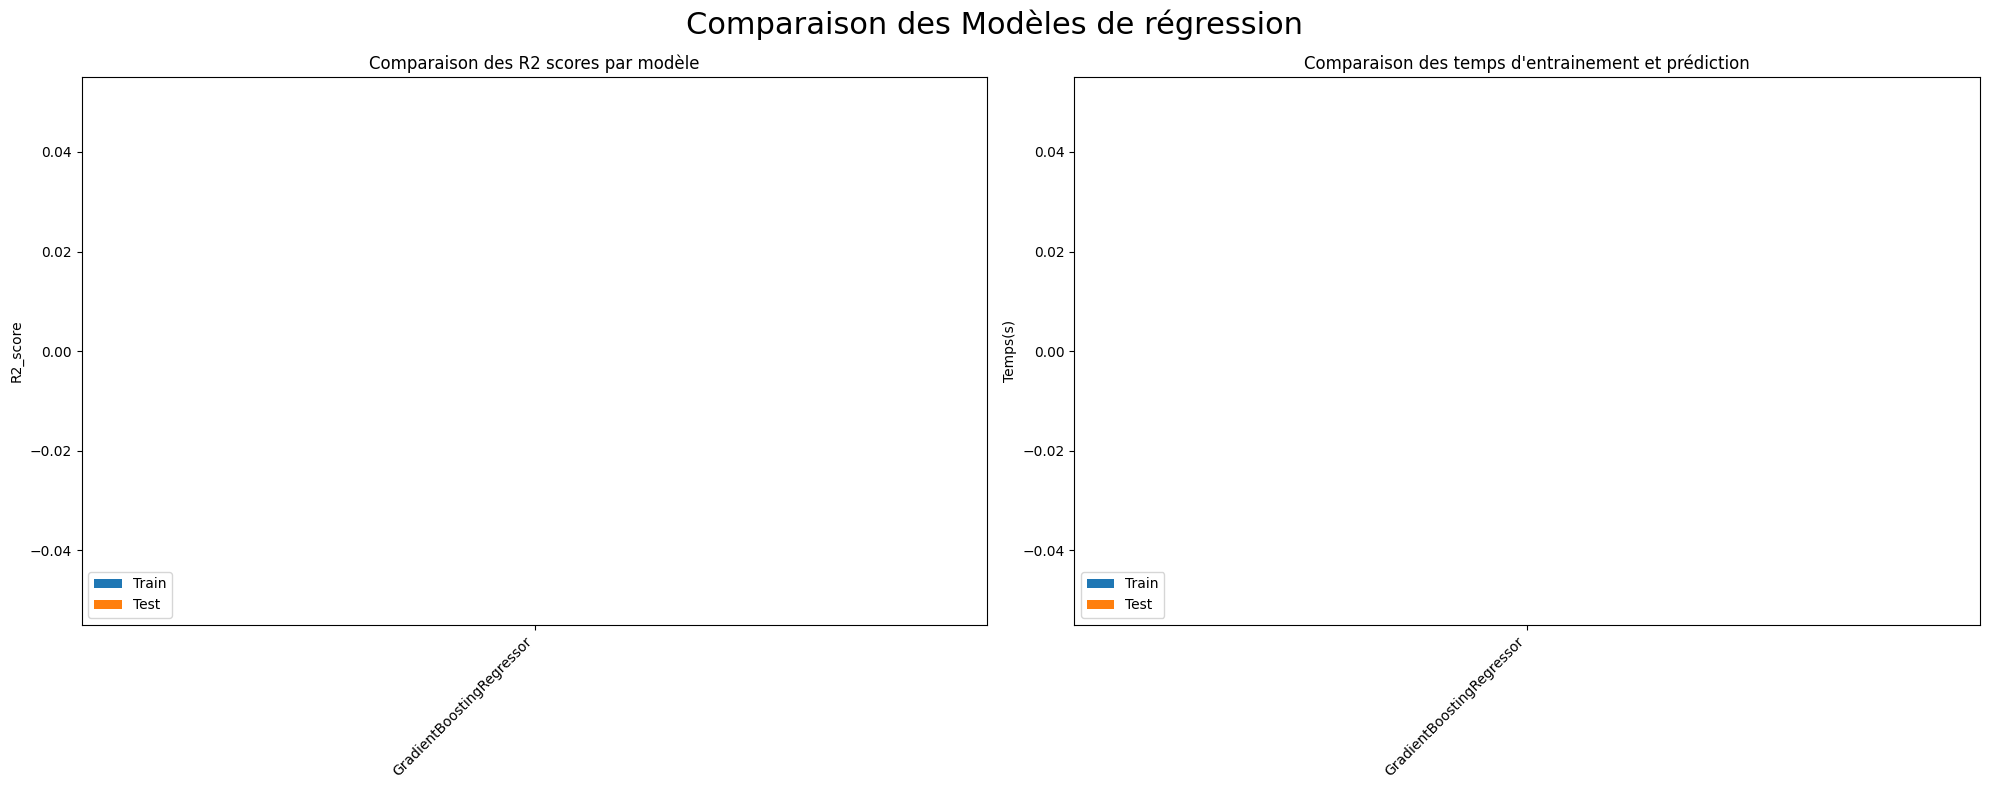

In [ ]:
# Comparaisons des modèles avec le R2 scrore comme métrique

x = np.arange(len(models_compare_metrics.index))
width = 0.35

fig, ax = plt.subplots(1, 2, figsize=(20, 8), sharey=False, sharex=False)
print(ax[0])
scores1 = ax[0].bar(x - width/2, models_compare_metrics['R2_score_train'], width, label='Train')
scores2 = ax[0].bar(x + width/2, models_compare_metrics['R2_score_test'], width, label='Test')
ax[0].set_ylabel('R2_score')
ax[0].set_title('Comparaison des R2 scores par modèle')
ax[0].set_xticks(x)
ax[0].set_xticklabels(models_compare_metrics.index, rotation=45, ha='right')
ax[0].legend()
ax[0].bar_label(scores1, padding=3)
ax[0].bar_label(scores2, padding=3)

times1 = ax[1].bar(x - width/2, models_compare_metrics['train_time'], width, label='Train')
times2 = ax[1].bar(x + width/2, models_compare_metrics['test_time'], width, label='Test')
ax[1].set_ylabel('Temps(s)')
ax[1].set_title("Comparaison des temps d'entrainement et prédiction")
ax[1].set_xticks(x)
ax[1].set_xticklabels(models_compare_metrics.index, rotation=45, ha='right')
ax[1].legend()
ax[1].bar_label(times1, padding=3, fmt='%.3f')
ax[1].bar_label(times2, padding=3, fmt='%.3f')

plt.suptitle("Comparaison des Modèles de régression", fontsize=22)
fig.tight_layout()

plt.show()

### Comparaison des modèles via la MAE score

AxesSubplot(0.125,0.11;0.352273x0.77)


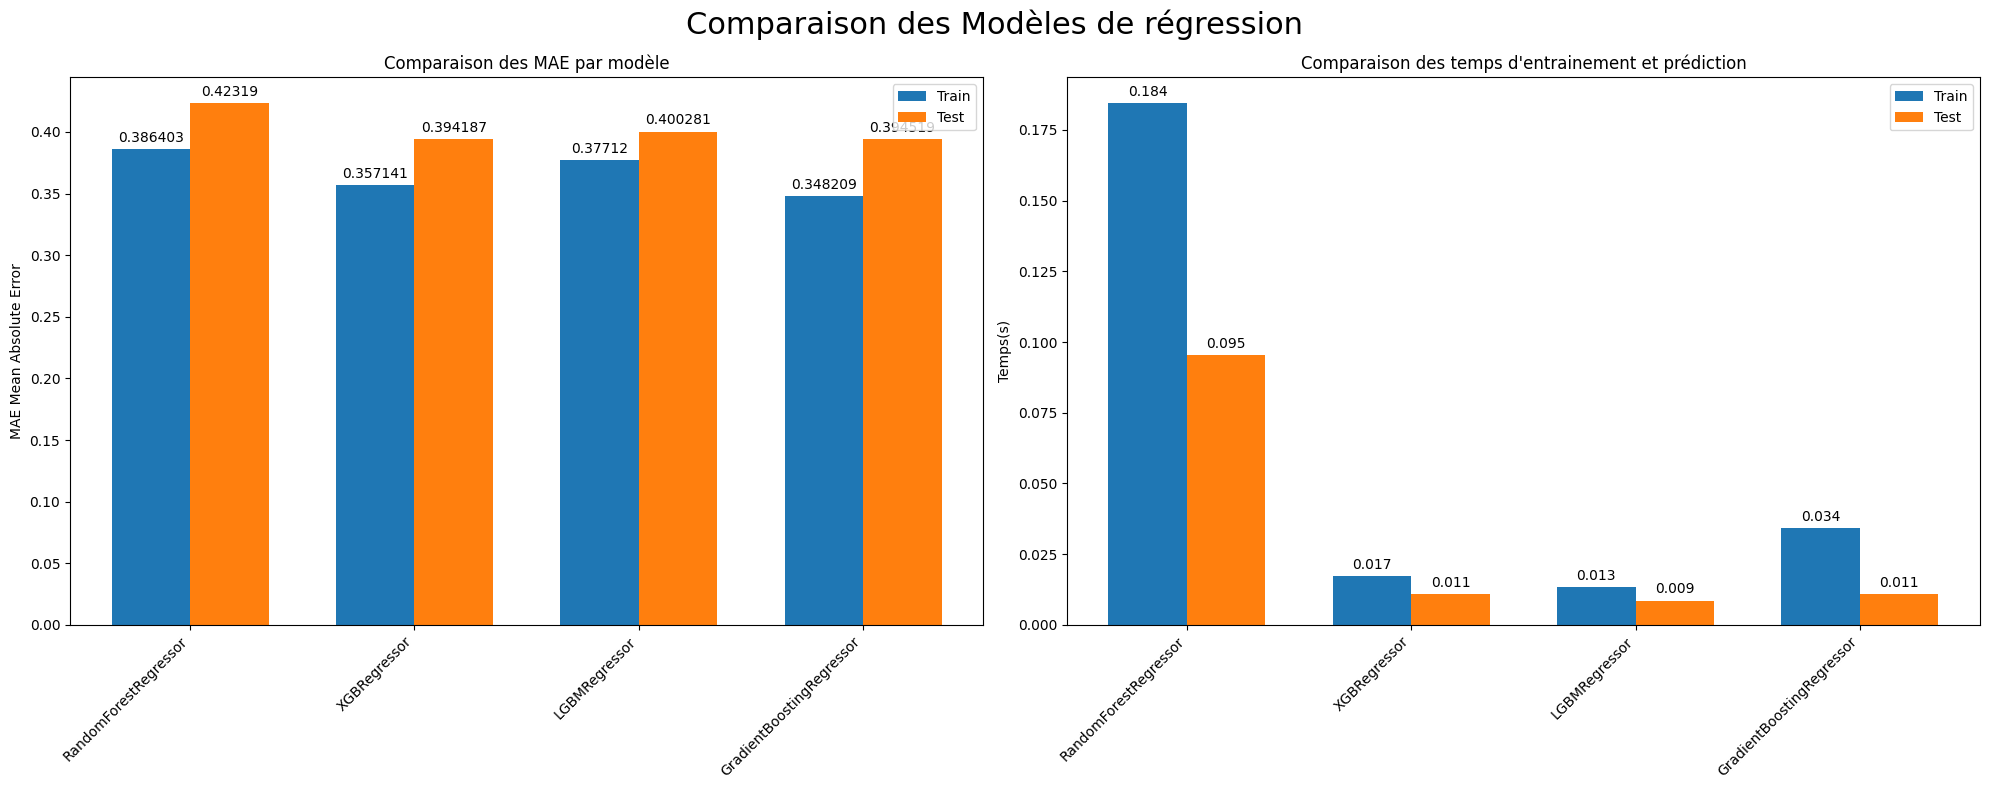

In [ ]:
# Comparaisons des modèles avec la MAE comme métrique
x = np.arange(len(models_compare_metrics.index))
width = 0.35

fig, ax = plt.subplots(1, 2, figsize=(20, 8), sharey=False, sharex=False)
print(ax[0])		
scores1 = ax[0].bar(x - width/2, models_compare_metrics['MAE_train_score'], width, label='Train')
scores2 = ax[0].bar(x + width/2, models_compare_metrics['MAE_test_score'], width, label='Test')
ax[0].set_ylabel('MAE Mean Absolute Error')
ax[0].set_title('Comparaison des MAE par modèle')
ax[0].set_xticks(x)
ax[0].set_xticklabels(models_compare_metrics.index, rotation=45, ha='right')
ax[0].legend()
ax[0].bar_label(scores1, padding=3)
ax[0].bar_label(scores2, padding=3)

times1 = ax[1].bar(x - width/2, models_compare_metrics['train_time'], width, label='Train')
times2 = ax[1].bar(x + width/2, models_compare_metrics['test_time'], width, label='Test')
ax[1].set_ylabel('Temps(s)')
ax[1].set_title("Comparaison des temps d'entrainement et prédiction")
ax[1].set_xticks(x)
ax[1].set_xticklabels(models_compare_metrics.index, rotation=45, ha='right')
ax[1].legend()
ax[1].bar_label(times1, padding=3, fmt='%.3f')
ax[1].bar_label(times2, padding=3, fmt='%.3f')

plt.suptitle("Comparaison des Modèles de régression", fontsize=22)
fig.tight_layout()

plt.show()

In [ ]:
best_model = joblib.load('data/best_model_XGBRegressor.pkl')
best_model

Pipeline(steps=[('preparation',
                 ColumnTransformer(transformers=[('data_numeric',
                                                  Pipeline(steps=[('scaling',
                                                                   RobustScaler())]),
                                                  ['haversinedistance',
                                                   'yearbuilt',
                                                   'largestpropertyusetypegfa',
                                                   'numberofbuildings',
                                                   'numberoffloors',
                                                   'propertygfabuildings']),
                                                 ('data_cat_onehot',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['buildingtype',...
                                                             gpu_id=None,
                                                             grow_policy=None,
                                                             importance_type=None,
                                                             interaction_constraints=None,
                                                             learning_rate=0.1,
                                                             max_bin=None,
                                                             max_cat_threshold=None,
                                                             max_cat_to_onehot=None,
                                                             max_delta_step=None,
                                                             max_depth=3,
                                                             max_leaves=None,
                                                             min_child_weight=None,
                                                             missing=nan,
                                                             monotone_constraints=None,
                                                             n_estimators=200,
                                                             n_jobs=None,
                                                             num_parallel_tree=None,
                                                             predictor=None,
                                                             random_state=None, ...)))])

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

# test the model on the test data and display the scores
Y_pred = best_model.predict(X_test)
mse = mean_squared_error(Y_test, Y_pred)
r2 = r2_score(Y_test, Y_pred)

print("Mean Squared Error:", mse)
print("R-squared Score:", r2)

Mean Squared Error: 0.3164021371434659
R-squared Score: 0.8158937066918861


In [ ]:
X.columns

Index(['haversinedistance', 'yearbuilt', 'is_using_electricitykWh',
       'is_using_naturalgaskWh', 'is_using_steamusekWh',
       'largestpropertyusetypegfa', 'numberofbuildings', 'numberoffloors',
       'propertygfabuildings', 'buildingtype', 'primarypropertytype'],
      dtype='object')

In [ ]:
new_data={
        'haversinedistance': '1.9784190775520638',
        'yearbuilt': '2008',
        'is_using_electricitykWh': '1',
        'is_using_naturalgaskWh': '1',
        'is_using_steamusekWh': '0',
        'largestpropertyusetypegfa': '89131.0',
        'numberofbuildings': '1',
        'numberoffloors': '5',
        'propertygfabuildings' : '89191.0',
        'buildingtype' : 'NonResidential',
        'primarypropertytype' : 'Medical Office'
}

real_result={'siteenergyusekWh' : '5641246.48338324',
             'totalghgemissions' : '477.85'} 
df_pred = pd.DataFrame(new_data, index=[0])
df_pred

,haversinedistance,yearbuilt,is_using_electricitykWh,is_using_naturalgaskWh,is_using_steamusekWh,largestpropertyusetypegfa,numberofbuildings,numberoffloors,propertygfabuildings,buildingtype,primarypropertytype
0,1.9784190775520638,2008,1,1,0,89131.0,1,5,89191.0,NonResidential,Medical Office


In [ ]:
import joblib

# Load the model
model_tm = joblib.load('data/best_model_GradientBoostingRegressor.pkl')

# Check the type of the loaded object
# print(model_tm)

In [ ]:
import joblib
# Access the underlying model from the pipeline
model_tm = joblib.load('data/best_model_GradientBoostingRegressor.pkl')

# Make predictions using the model
pred_satisfaction = model_tm.predict(df_pred)

# Continue with the rest of your code
pred_satisfaction_original = pred_satisfaction
ghgemissions = np.exp(round(pred_satisfaction_original[0][0], 2))
energyuse = np.exp(round(pred_satisfaction_original[0][1], 2))
print("Total GHG Emissions:", ghgemissions, "équivalent tonne CO2")
print("Site Energy Use:", energyuse, "kWh")
print(real_result)

Total GHG Emissions: 159.17432734329714 équivalent tonne CO2
Site Energy Use: 2757954.9419970755 kWh
{'siteenergyusekWh': '5641246.48338324', 'totalghgemissions': '477.85'}


In [ ]:
print(np.log(477.85))

6.169296875712189


In [ ]:
train_pred_ghgemissions = pd.DataFrame(np.exp(model_tm.predict(X)))[0]
train_pred_ghgemissions


0        420.131167
1        228.992427
2       1932.078210
3        243.327691
4        310.367800
           ...     
3191      38.123826
3192      37.059711
3193      94.588343
3194      41.936462
3195      37.402540
Name: 0, Length: 3196, dtype: float64

In [ ]:
train_pred_siteenergy = pd.DataFrame(np.exp(model_tm.predict(X)))[1]
train_pred_siteenergy

0       2.315500e+06
1       2.200295e+06
2       1.879684e+07
3       1.433289e+06
4       3.153095e+06
            ...     
3191    3.976705e+05
3192    3.881468e+05
3193    9.242237e+05
3194    3.018170e+05
3195    3.618373e+05
Name: 1, Length: 3196, dtype: float64

In [ ]:
real_ghgemissions = np.exp(Y['log_totalghgemissions'])
real_ghgemissions

0        250.98
1        296.86
2       2090.28
3        287.43
4        506.01
         ...   
3206      21.33
3207      33.17
3208     224.54
3209      23.11
3210      42.27
Name: log_totalghgemissions, Length: 3196, dtype: float64

In [ ]:
real_siteenergy = np.exp(Y['log_siteenergyusekwh'])
real_siteenergy

0       2.117839e+06
1       2.458261e+06
2       2.127316e+07
3       1.991297e+06
4       4.153582e+06
            ...     
3206    2.731673e+05
3207    2.784995e+05
3208    1.689819e+06
3209    2.108572e+05
3210    3.378815e+05
Name: log_siteenergyusekwh, Length: 3196, dtype: float64

In [ ]:
import plotly.express as px
import plotly.offline as pyo

# Initialize notebook mode
pyo.init_notebook_mode(connected=True)
X_graph = pd.DataFrame()
X_graph['real_siteenergy'] = np.exp(Y['log_siteenergyusekwh'])
X_graph['train_pred_siteenergy'] = pd.DataFrame(np.exp(model_tm.predict(X_test)))[1]
X_graph['largestpropertyusetypegfa'] = X['largestpropertyusetypegfa']
X_graph['buildingtype'] = X['buildingtype']
# Count the number of observations
X_graph['num_observations'] = len(X_graph)

pd.DataFrame(np.exp(model_tm.predict(X)))[1]
# Create a scatter plot for real_siteenergy vs train_pred_siteenergy
fig2 = px.scatter(data_frame=X_graph, x='real_siteenergy', y='train_pred_siteenergy', title='Correlation: Real vs Predicted Site Energy',
                 hover_data=['largestpropertyusetypegfa', 'num_observations'], color='buildingtype')
fig2.update_xaxes(title='Real Site Energy')
fig2.update_yaxes(title='Predicted Site Energy')
fig2

In [ ]:
import plotly.express as px    
X_graph = pd.DataFrame()
X_graph['real_ghgemissions'] = real_ghgemissions
X_graph['train_pred_ghgemissions'] = train_pred_ghgemissions
X_graph['largestpropertyusetypegfa'] = X['largestpropertyusetypegfa']
X_graph['buildingtype'] = X['buildingtype']

# Count the number of observations
X_graph['num_observations'] = len(X_graph)

# Create a scatter plot for real_ghgemissions vs train_pred_ghgemissions
fig = px.scatter(data_frame= X_graph, x='real_ghgemissions', y='train_pred_ghgemissions', title='Correlation: Real vs Predicted GHG Emissions',
                 hover_data=['largestpropertyusetypegfa', 'num_observations'], color='buildingtype')
fig.update_xaxes(title='Real GHG Emissions')
fig.update_yaxes(title='Predicted GHG Emissions')
fig

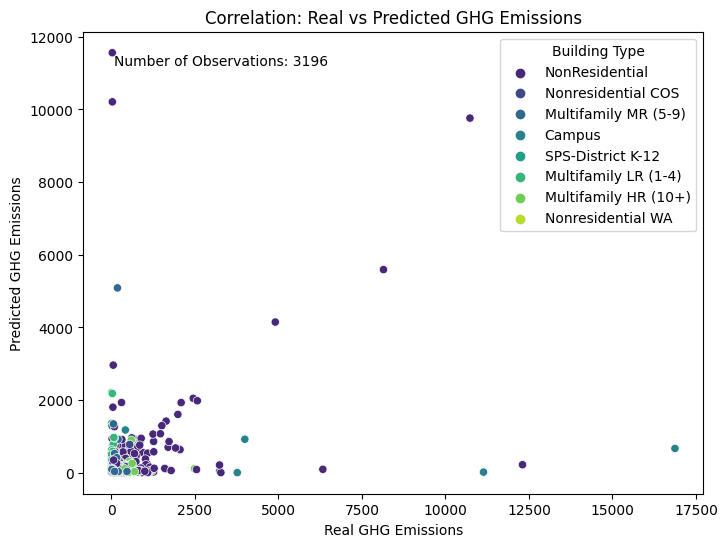

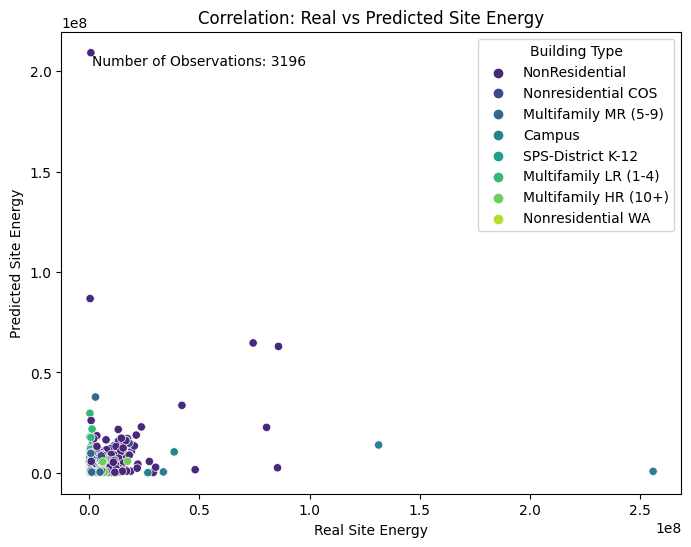

In [ ]:
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

buildingtype = X_graph['buildingtype']
# Convert buildingtype column to numeric labels
label_encoder = LabelEncoder()
buildingtype_labels = label_encoder.fit_transform(buildingtype)
buildingtype_names = label_encoder.classes_

# Get unique building types and assign colors
unique_buildingtypes = buildingtype.unique()
num_buildingtypes = len(unique_buildingtypes)
color_palette = sns.color_palette('viridis', num_buildingtypes)
color_dict = dict(zip(unique_buildingtypes, color_palette))

# Create a scatter plot for real_ghgemissions vs train_pred_ghgemissions
plt.figure(figsize=(8, 6))
sns.scatterplot(x=real_ghgemissions, y=train_pred_ghgemissions, hue=buildingtype, palette=color_dict)
plt.xlabel('Real GHG Emissions')
plt.ylabel('Predicted GHG Emissions')
plt.title('Correlation: Real vs Predicted GHG Emissions')
plt.text(0.05, 0.95, f'Number of Observations: {len(real_ghgemissions)}',
         transform=plt.gca().transAxes, fontsize=10, verticalalignment='top')
plt.legend(title='Building Type')
plt.show()

# Create a scatter plot for real_siteenergy vs train_pred_siteenergy
plt.figure(figsize=(8, 6))
sns.scatterplot(x=real_siteenergy, y=train_pred_siteenergy, hue=buildingtype, palette=color_dict)
plt.xlabel('Real Site Energy')
plt.ylabel('Predicted Site Energy')
plt.title('Correlation: Real vs Predicted Site Energy')
plt.text(0.05, 0.95, f'Number of Observations: {len(real_siteenergy)}',
         transform=plt.gca().transAxes, fontsize=10, verticalalignment='top')
plt.legend(title='Building Type')
plt.show()

## Outliers detections

<p> Sur les précédents graphiques on observe une divergence entre valeurs prédites et valeurs réelles,</br>
 pour certaines observations voyons si cela est dûe à des outliers.</p>

### Z-score method:

In [ ]:
df = pd.read_csv('data/dataset_for_z_score.csv')

In [ ]:
# Calculate the Z-scores for the columns containing the target variables:
target_columns = ['log_totalghgemissions', 'log_siteenergyusekwh']
z_scores = np.abs(stats.zscore(df[target_columns]))

In [ ]:
threshold = 3

In [ ]:
# Identify the indices of the outliers based on the Z-scores exceeding the threshold:
outlier_indices = np.where(z_scores > threshold)

In [ ]:
outliers = df.iloc[outlier_indices[0]]
outliers


,siteenergyusekWh,totalghgemissions,log_totalghgemissions,log_siteenergyusekwh,haversinedistance,yearbuilt,is_using_electricitykWh,is_using_naturalgaskWh,is_using_steamusekWh,largestpropertyusetypegfa,numberofbuildings,numberoffloors,propertygfabuildings,buildingtype,primarypropertytype
2,2.127316e+07,2089.28,7.645053,16.872957,0.970109,1969,1.0,1.0,1.0,756493.0,1.0,41,759392.0,NonResidential,Hotel
31,1.314088e+08,16870.98,9.733410,18.693823,7.996343,1992,1.0,1.0,0.0,757027.0,1.0,3,494835.0,Campus,Mixed Use Property
31,1.314088e+08,16870.98,9.733410,18.693823,7.996343,1992,1.0,1.0,0.0,757027.0,1.0,3,494835.0,Campus,Mixed Use Property
44,2.358320e+07,2451.58,7.804896,16.976045,0.528209,1982,1.0,1.0,1.0,994212.0,1.0,34,847518.0,NonResidential,Hotel
104,7.439095e+07,8145.52,9.005346,18.124845,7.302384,1953,1.0,1.0,0.0,879000.0,6.0,10,879000.0,NonResidential,Hospital
104,7.439095e+07,8145.52,9.005346,18.124845,7.302384,1953,1.0,1.0,0.0,879000.0,6.0,10,879000.0,NonResidential,Hospital
133,4.203314e+07,4906.33,8.498485,17.553969,1.684969,1990,1.0,1.0,0.0,601615.0,6.0,5,597519.0,NonResidential,Hospital
133,4.203314e+07,4906.33,8.498485,17.553969,1.684969,1990,1.0,1.0,0.0,601615.0,6.0,5,597519.0,NonResidential,Hospital
135,8.589643e+07,10734.57,9.281318,18.268653,0.671123,2000,1.0,1.0,1.0,1350182.0,9.0,8,1158691.0,NonResidential,Hospital
135,8.589643e+07,10734.57,9.281318,18.268653,0.671123,2000,1.0,1.0,1.0,1350182.0,9.0,8,1158691.0,NonResidential,Hospital


In [ ]:
# Remove the rows with outliers
df_without_outliers = df.drop(outlier_indices[0])

# Save the updated DataFrame to a new CSV file
df_without_outliers.to_csv('your_dataset_without_outliers.csv', index=False)

In [ ]:
for index, params in zip(models_compare_metrics.index, models_compare_metrics['Best_parameters']):
  print(index, ":", params)

RandomForestRegressor : {'model__estimator__max_depth': 7, 'model__estimator__n_estimators': 500}
XGBRegressor : {'model__estimator__learning_rate': 0.1, 'model__estimator__max_depth': 3, 'model__estimator__n_estimators': 200}
LGBMRegressor : {'model__estimator__learning_rate': 0.1, 'model__estimator__max_depth': 3, 'model__estimator__n_estimators': 200}
GradientBoostingRegressor : {'model__estimator__learning_rate': 0.1, 'model__estimator__loss': 'squared_error', 'model__estimator__max_depth': 3, 'model__estimator__n_estimators': 200}
